## This notebook demonstrates the use of PCA and T-SNE for dimensionality reduction

**The dataset used is the same MNIST dataset**

We first do the standard stuff as in the previous programs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
import os


In [2]:
#traindata = pd.read_csv('train.csv')
traindata = pd.read_csv(r'../Data/MNIST/train.csv')
traindata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data here has the labels in the first column, and the actual pixels of the digit in the other columns. We will now separate them.

In [3]:
labels = np.asarray(traindata.label) 
digits = np.asarray(traindata)
digits = digits[:,1:]

The labels array contains the labels of the data. The digits array contais the actual data, one digit per row. The digits are 28x28 pixels. Now we will trite a small function to visualize any digit we want.

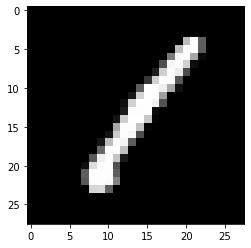

In [4]:
def getDigit(arr):
    pic = np.reshape(arr,[28,28])
    pic = np.uint8(pic)
    return pic

pic = getDigit(digits[0,:])
plt.imshow(pic,'gray')

## Principal Component Analysis ##

We have seen how we reduce the data to a lower number of dimensions. However, if we normalize the data to zero-mean unit deviation before feeding it into PCA, we can usually get better results.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
normDigits = scaler.fit_transform(digits)


Now we apply PCA as before, and see the results.

(42000, 2)
[-0.80579544 -0.96866915]


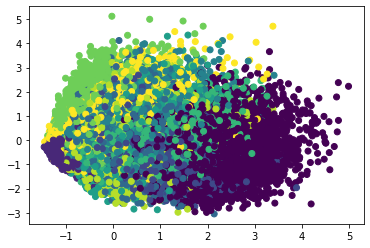

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,whiten=True)
lowdigits = pca.fit_transform(normDigits)
print(lowdigits.shape)
print(lowdigits[0,:])
plt.scatter(lowdigits[:,0],lowdigits[:,1],c=labels)
plt.show()

We can compare this with the PCA without normalization

(42000, 2)
[-1.1434366 -1.4102657]


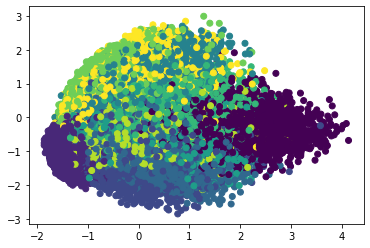

In [7]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2,whiten=True)
lowdigits2 = pca2.fit_transform(digits)
print(lowdigits2.shape)
print(lowdigits2[0,:])
plt.scatter(lowdigits2[:,0],lowdigits2[:,1],c=labels)
plt.show()

## Nearest Neighbor and K-Nearest Neighbor Classification ##

##### These are classification techniques that don't use complicated models. They just look at the label of the nearest training data point(s) to determine a label for the test data. #####

##### Advantages: #####
Very simple. No need to learn complex models.

##### Disadvantages: #####
Always need access to the training data to classify, since no separate classifier is learned.

Let's see the demo of this below. We pick a random digit and try to guess what it is by NN and K-NN methods.

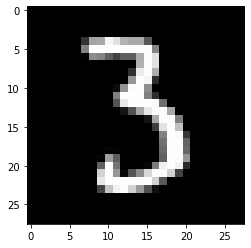

In [16]:
guessIdx = np.random.randint(0,digits.shape[0])
guess = digits[guessIdx,:]
plt.imshow(getDigit(guess),'gray')
guess = np.reshape(guess,(1,len(guess)))

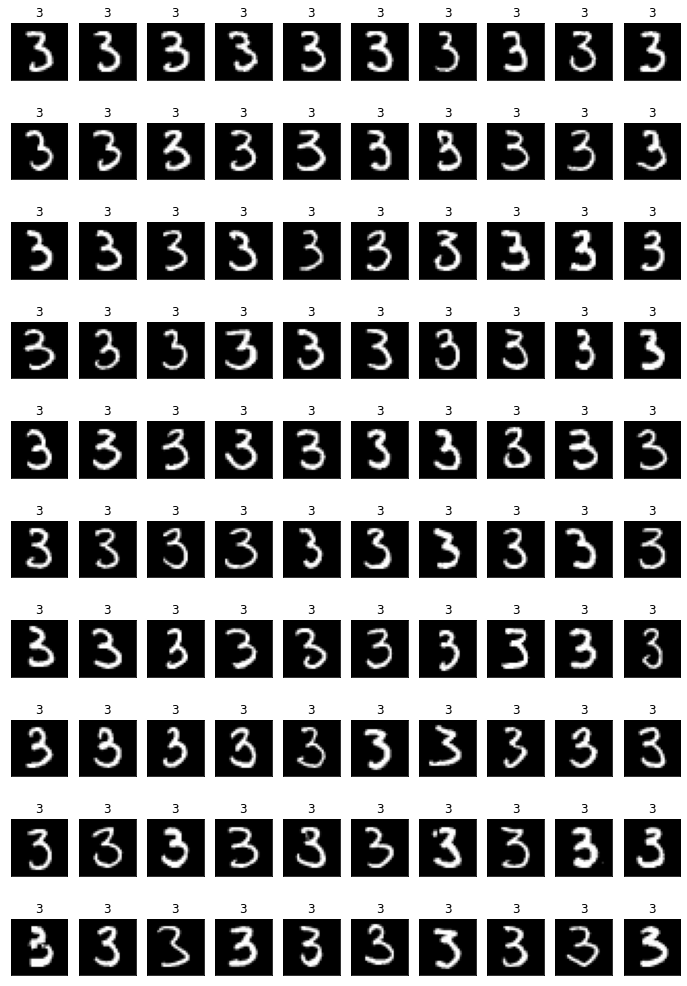

In [17]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

dists1 = euclidean_distances(guess,digits)
sortedIdx = np.argsort(dists1)
sortedIdx = np.squeeze(sortedIdx)
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(100):
    y = fig.add_subplot(10, 10, i+1)
    img = getDigit(digits[sortedIdx[i],:])
       
    str_label= str(labels[sortedIdx[i]])
    
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
   
plt.show()

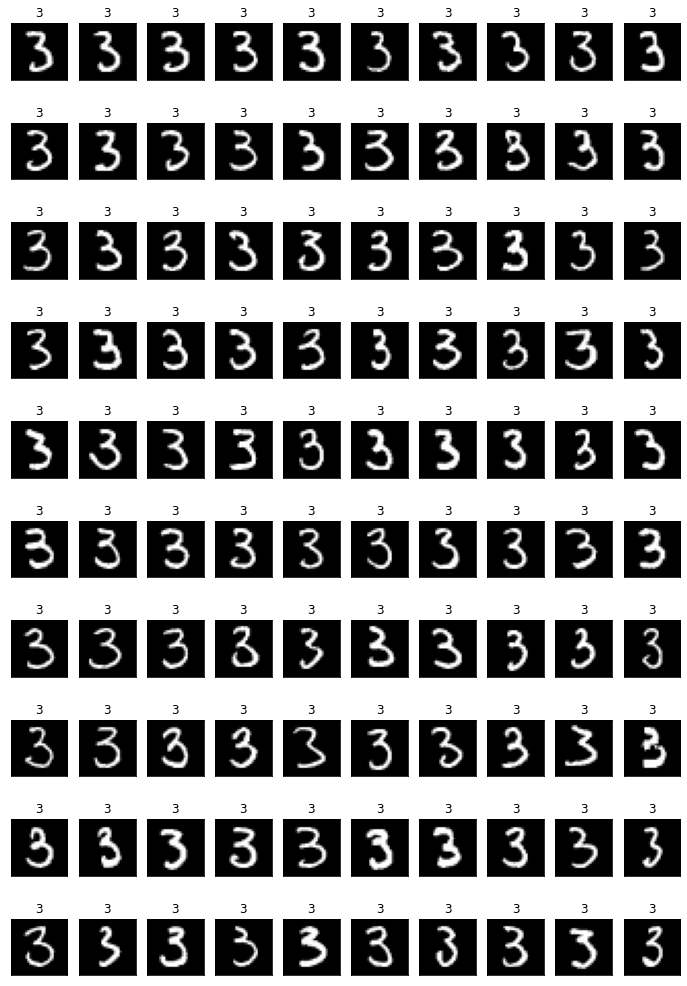

In [18]:
dists2 = manhattan_distances(guess,digits)
sortedIdx = np.argsort(dists2)
sortedIdx = np.squeeze(sortedIdx)
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(100):
    y = fig.add_subplot(10, 10, i+1)
    img = getDigit(digits[sortedIdx[i],:])
       
    str_label= str(labels[sortedIdx[i]])
    
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
   
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(digits, labels)